<a href="https://colab.research.google.com/github/jane95924/WEEK_13_IP/blob/master/WEEK_13_IP_PART_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPERVISED LEARNING WITH R.

1. Defining the question.



> As a data scientist i would like to identify individuals that are most likely to click on an entrepreneurs ads.

2. Metrics of success



> Our goal is to identify the individuals that are most likely to click on the ad, getting the right age,time, and getting related factors would make this project a success.


3. The context


> Advertising is communicating with the product or service users. They could be messages or videos or a piece of art. There are many other ways to advertise. Advertising in business is key for the success of each business. A good advert would be knowing your target audience. Understanding your audience makes your product/service sell and you get more profits.

4. Experimental design



*   Load our dataset and preview Exploratory analysis.
*   Data cleaning, check for missing data, outliers ,duplicates and deal with them

*   Univariate analysis
*   Bivariate analysis Multivariate analysis.


*   KNN
*   SVM


*   Naive Bayes
*   Decision Trees.




*  Challenging our solution using random forest.
*   Conclusion and Recommendation 

*   Follow up questions







5. Appropriateness of the data

>Our data is appropriate for our research question, it has 1000 rows and 10 columns. We have no missing values, no duplicates and no outliers. the columns are relevant to our research question, our target variable, if an individual clicked on the ad, the time spent on the site, internet used that day, time stamp,city,country,gender and the income.


In [ ]:
#load the dataset we will need
data <- read.csv('/content/advertising.csv')
#Preview the head of our dataset
head(data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
#Preview the tail
tail(data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


##INITIAL DATA EXPLORATION

In [ ]:
#Check the dimension of our dataset
dim(data)

[1] 1000   10

Our dataset has 1000 rows and 10 columns.

In [ ]:
#We check what our dataset is comprised of
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [ ]:
#we want to check our data types of each attribute
sapply(data,class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"                 "factor"                 "factor" 
                    Male                  Country                Timestamp 
               "integer"                 "factor"                 "factor" 
           Clicked.on.Ad 
               "integer"

In [ ]:
#Check the summary of our dataset
summary(data)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

From what we have seen above,

The daily time spent on site is numerical data type, minimum time spent is 32.60 , the maximum time spent on site is 91.43 and the mean is 65.00

Age is an integer. The minimum age is 19 and the maximum age is  61. The mean age is 36.01

Area income, the area income ramges from  13996 to  79485. The mean income is 55,000. Its data type is numerical.

The daily internet usage is numerical data type. The minimum daily internet usage is 104.8 and the maximum is 270.0. The mean daily internet usage is 108.0



##DATA CLEANING

In [ ]:
#checking for null values
colSums(is.na(data))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

We have no null values in our dataset.

In [ ]:
#We check if we do have any duplicates in our dataset
#We store our duplicates in  a new dataframe if any
duplicated_rows <- data[duplicated(data),]
#Check in the dataframe if we have any duplicates.
duplicated_rows

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>


We have no duplicates in our dataset.

In [ ]:
##The time stamp can be split to hours,minutes,seconds.
#We first change the data type to time stamp
data[["Timestamp"]] <- as.POSIXct(data$Timestamp, tz=Sys.timezone())
str(data)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


We will extract day, month,year,hour,minutes and seconds from the timestamp column. It is in the format YYYY.MM.DD.HH.MIN.SEC

In [ ]:
#Extract the day.
data$day <- format(as.POSIXct(strptime(data$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")), format = "%d") 
head(data$day)

[1] "27" "04" "13" "10" "03" "19"

In [ ]:
#Extract month
data$month <- format(as.POSIXct(strptime(data$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")), format = "%m")
head(data$month)

[1] "03" "04" "03" "01" "06" "05"

In [ ]:
#Extract the year
data$year <- format(as.POSIXct(strptime(data$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")), format = "%Y")
head(data$year)

[1] "2016" "2016" "2016" "2016" "2016" "2016"

In [ ]:
#Extract hours.
data$hour <- format(as.POSIXct(strptime(data$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")), format = "%H")
head(data$hour)

[1] "00" "01" "20" "02" "03" "14"

In [ ]:
#Extract minutes
data$min <- format(as.POSIXct(strptime(data$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")) ,format = "%M")
head(data$min)

[1] "53" "39" "35" "31" "36" "30"

In [ ]:
#Extract seconds.
data$sec <- format(as.POSIXct(strptime(data$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")) ,format = "%S")
head(data$sec)

[1] "11" "02" "42" "19" "18" "17"

In [ ]:
#We now paste our column names 
paste(head(data$year), head(data$month), head(data$day), head(data$hour), head(data$min), head(data$sec))

[1] "2016 03 27 00 53 11" "2016 04 04 01 39 02" "2016 03 13 20 35 42"
[4] "2016 01 10 02 31 19" "2016 06 03 03 36 18" "2016 05 19 14 30 17"

In [ ]:
#We check the column names to confirm our changes
names(data)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"           
[11] "day"                      "month"                   
[13] "year"                     "hour"                    
[15] "min"                      "sec"

In [ ]:
#We now change our new variables to numeric for analysis.
data[,10:15] <- sapply(data[,10:15],as.numeric) 
class(data$day)

[1] "numeric"

In [ ]:
#check the data types we are changed
sapply(data,class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"                 "factor"                 "factor" 
                    Male                  Country                Timestamp 
               "integer"                 "factor"                 "factor" 
           Clicked.on.Ad                      day                    month 
               "numeric"                "numeric"                "numeric" 
                    year                     hour                      min 
               "numeric"                "numeric"                "numeric" 
                     sec 
             "character"

Our columns are now ok. We can go ahead and analyse.

##DATA ANALYSIS.

UNIVARIATE ANALYSIS.

In [ ]:
#Let us get the summary
summary(data)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

In [ ]:
#We do not have an inbuilt method to get the mode, we are going to use the function in getting the 
#mode of our variables
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


1. Daily time spent on site.

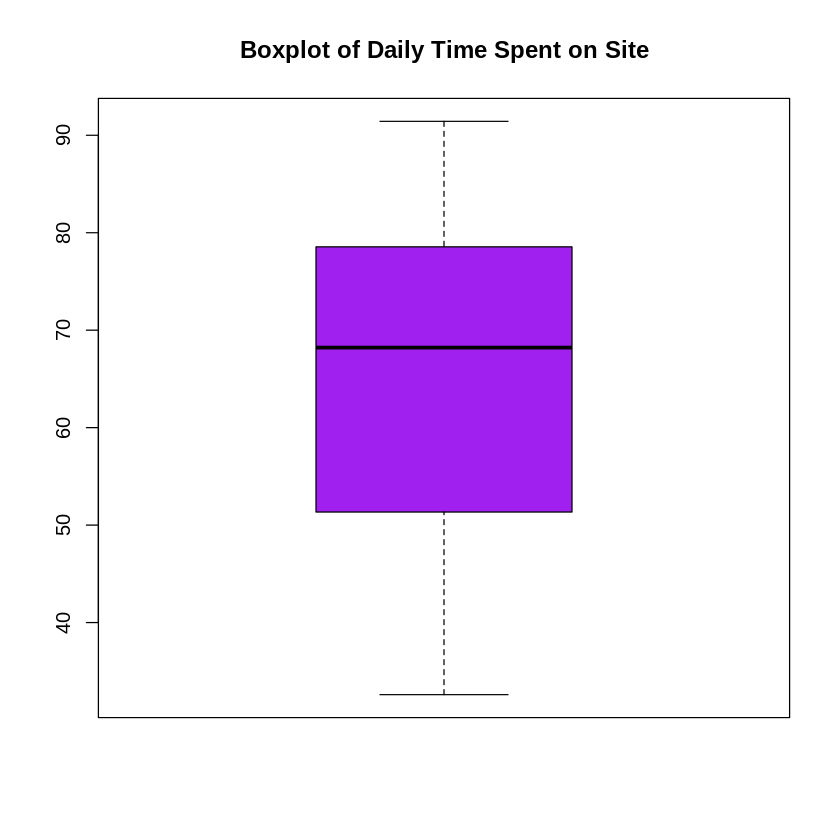

In [ ]:
#we plot a boxplot to see the distribution of daily time spent on site.
boxplot(data$Daily.Time.Spent.on.Site,col = 'purple', main = "Boxplot of Daily Time Spent on Site")


In [ ]:
#Check the mode daily time spent on site.
paste("mode:",getmode(data$Daily.Time.Spent.on.Site))

[1] "mode: 62.26"

In [ ]:
#we get the range
paste("range:",range(data$Daily.Time.Spent.on.Site))

[1] "range: 32.6"  "range: 91.43"

In [ ]:
#We get the variance
#this is the variable distribution from the mean.
paste("Variance:",var(data$Daily.Time.Spent.on.Site))

[1] "Variance: 251.337094854855"

In [ ]:
#We check the standard deviation
paste('Std dev:',sd(data$Daily.Time.Spent.on.Site))

[1] "Std dev: 15.8536145675002"

In [ ]:
install.packages('propagate')
library(propagate)
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Daily.Time.Spent.on.Site))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘sandwich’, ‘mvtnorm’, ‘gmm’, ‘bit’, ‘tmvtnorm’, ‘ff’, ‘minpack.lm’


Loading required package: MASS

Loading required package: tmvtnorm

Loading required package: mvtnorm

Loading required package: Matrix

Loading required package: stats4

Loading required package: gmm

Loading required package: sandwich

Loading required package: Rcpp

Loading required package: ff

Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:base’:

    xor


Attaching package ff

- getOption("fftempdir")=="/tmp/RtmpqPQrWP/ff"


- getOption("ffextension")=="ff"


- getOption("ffdrop")==TRUE


- getOption("fffinonexit")==TRUE


- getOption("ffpagesize")==65536


- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes


- getOption("ffbatchbytes")==16777216 -- consider a different value for tu

[1] "Kurtosis: -1.09605784598919"

In [ ]:
paste('Skewness:',skewness(data$Daily.Time.Spent.on.Site))

[1] "Skewness: -0.371202614867441"

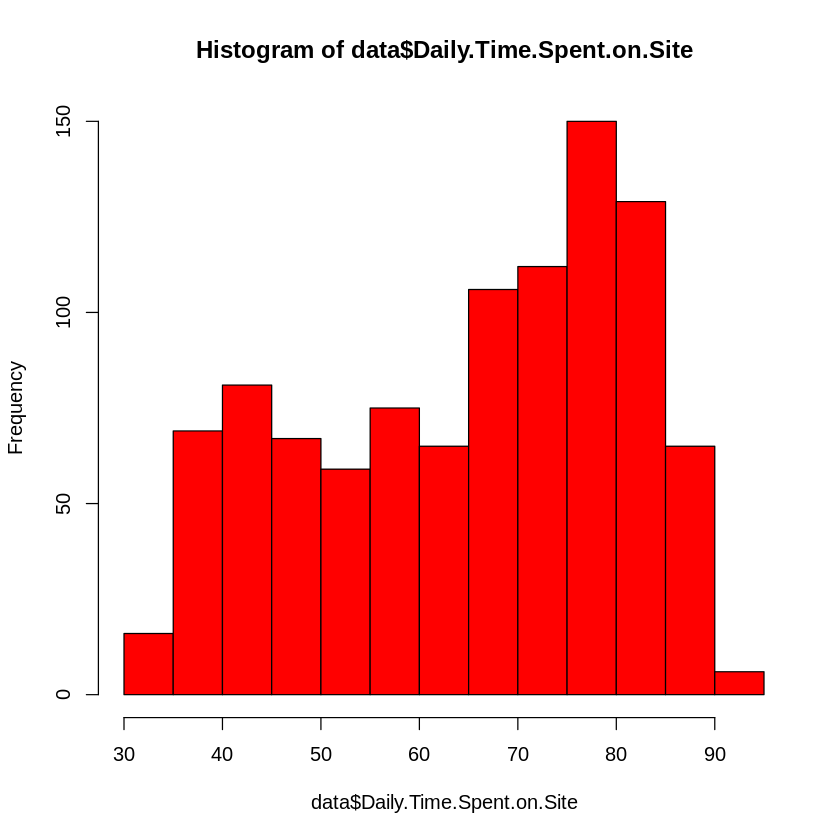

In [ ]:
# we can visualise this using a histogram
hist(data$Daily.Time.Spent.on.Site,col='red')

From our analysis above, we can see that

The daily time spent on site has no outliers.

The mode time spent on the site is 62.26

It has a high variance, large dispersion around the mean using the standard deviation.

Daily time spent on site is negatively skewed and it has a negative kurtosis, this means the tail is thinner/ the outlier character is less extreme than expected if  the data was normally distributed.

2. Age

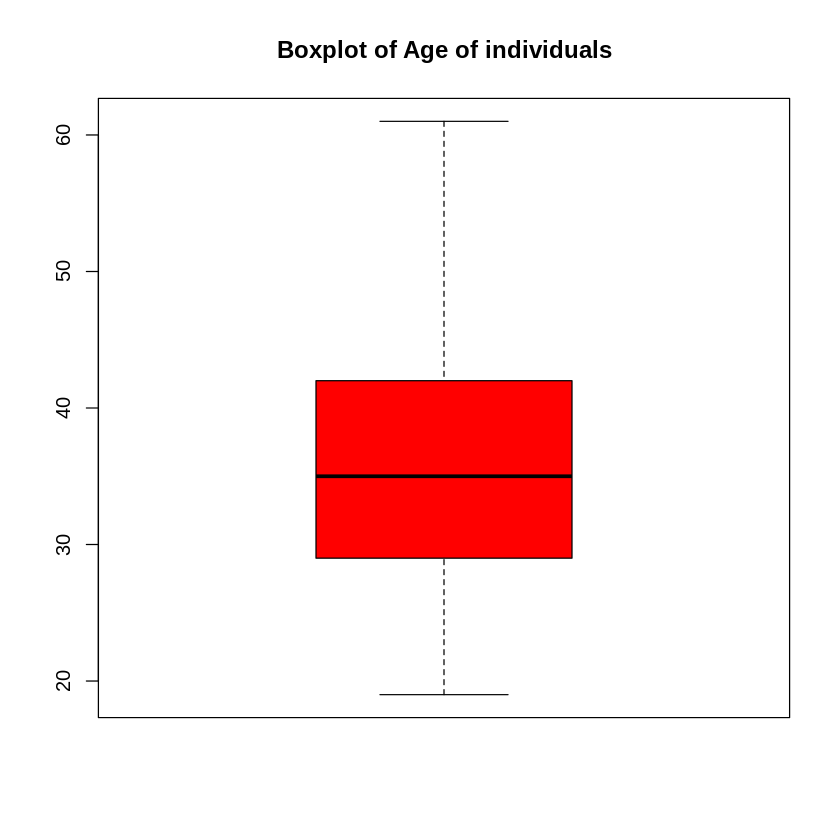

In [ ]:
#we plot a boxplot to see the distribution of Age.
boxplot(data$Age,col = 'red', main = "Boxplot of Age of individuals")

In [ ]:
#Check the mode Age
paste("mode:",getmode(data$Age))

[1] "mode: 31"

In [ ]:
#We get the variance
paste("Variance:",var(data$Age))
#We check the standard deviation
paste('Std dev:',sd(data$Age))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Age))
#Check skewness
paste('Skewness:',skewness(data$Age))

[1] "Variance: 77.1861051051051"

[1] "Std dev: 8.78556231012592"

[1] "Kurtosis: -0.404518231922744"

[1] "Skewness: 0.478422676206608"

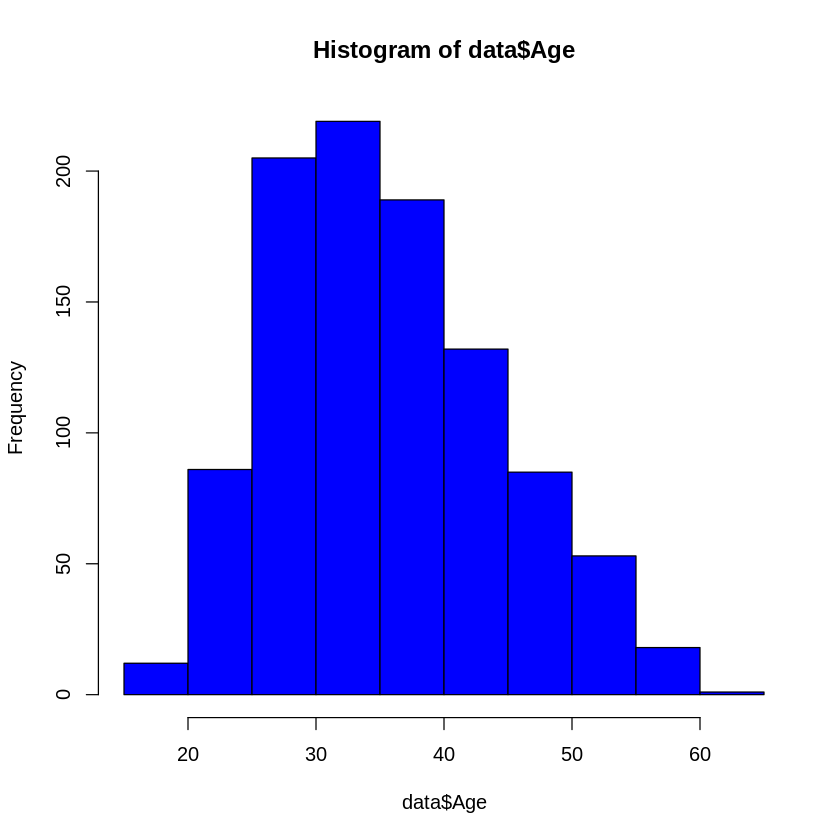

In [ ]:
# we can visualise this using a histogram
hist(data$Age,col='blue')

From our analysis,

The mode age is 31

We have no outliers in the column.

Age is positively skewed , the age standard deviation is 8years.

It has a negative kurtosis, meaning thinner tail.

3. Daily internet usage

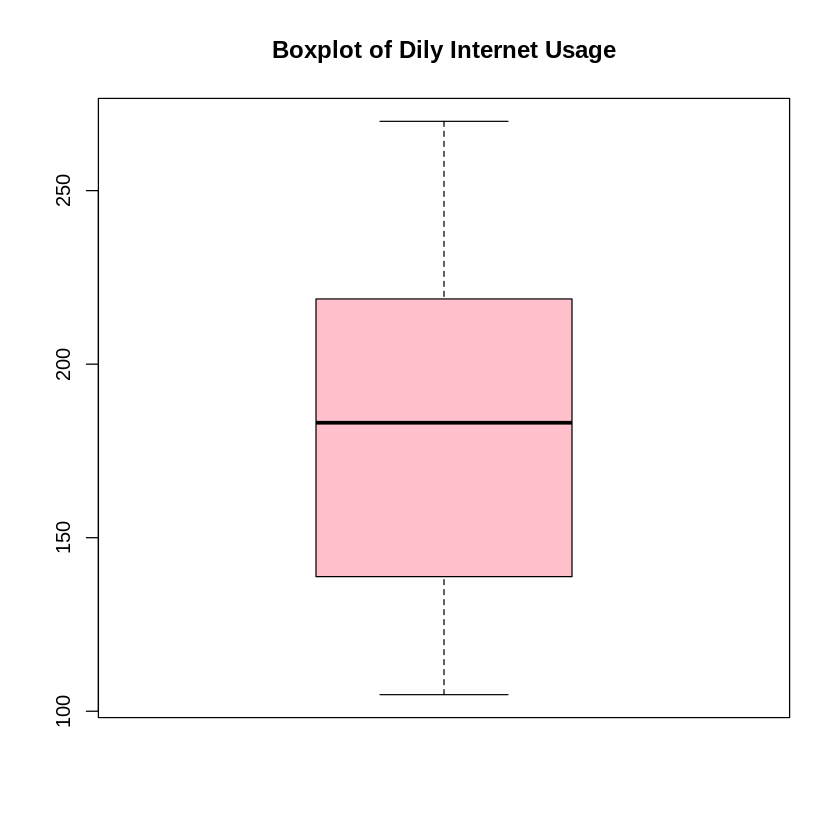

In [ ]:
#we plot a boxplot to see the distribution of daily internet used.
boxplot(data$Daily.Internet.Usage,col = 'Pink', main = "Boxplot of Dily Internet Usage")

In [ ]:
#Check the mode 
paste("mode:",getmode(data$Daily.Internet.Usage))
#We get the variance
paste("Variance:",var(data$Daily.Internet.Usage))
#We check the standard deviation
paste('Std dev:',sd(data$Daily.Internet.Usage))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Daily.Internet.Usage))
#Check skewness
paste('Skewness:',skewness(data$Daily.Internet.Usage))

[1] "mode: 167.22"

[1] "Variance: 1927.41539618619"

[1] "Std dev: 43.9023393019801"

[1] "Kurtosis: -1.27229881905181"

[1] "Skewness: -0.0334870316434409"

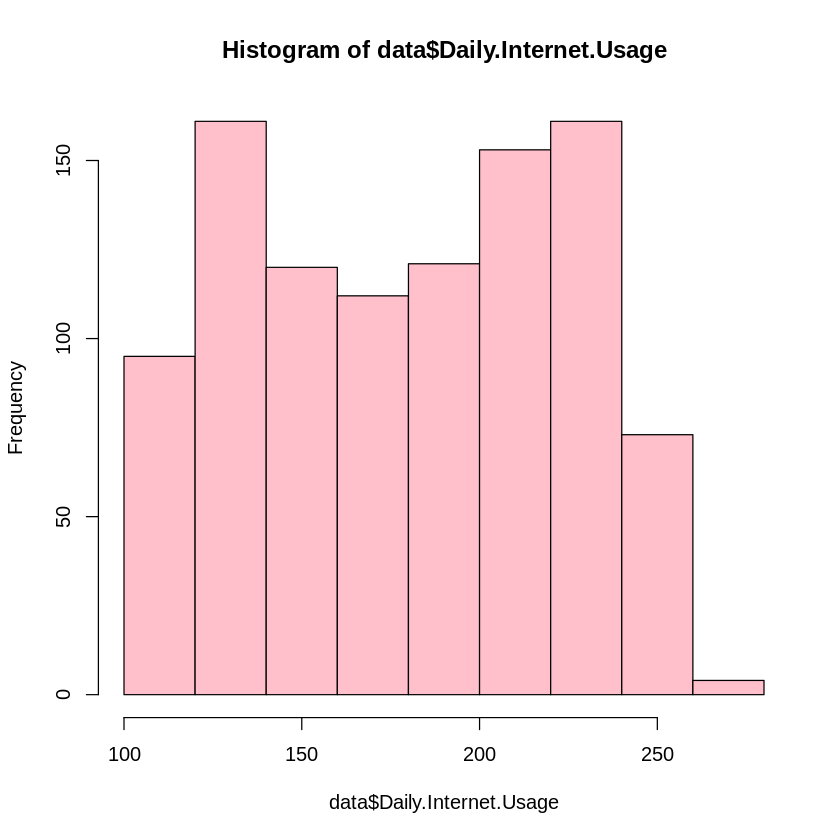

In [ ]:
# we can visualise this using a histogram
hist(data$Daily.Internet.Usage,col='pink')

From our analysis,

Daily internet used is negatively skewed and has a negative kurtosis.

It has a very high variance and has no outliers.

4. Area Income

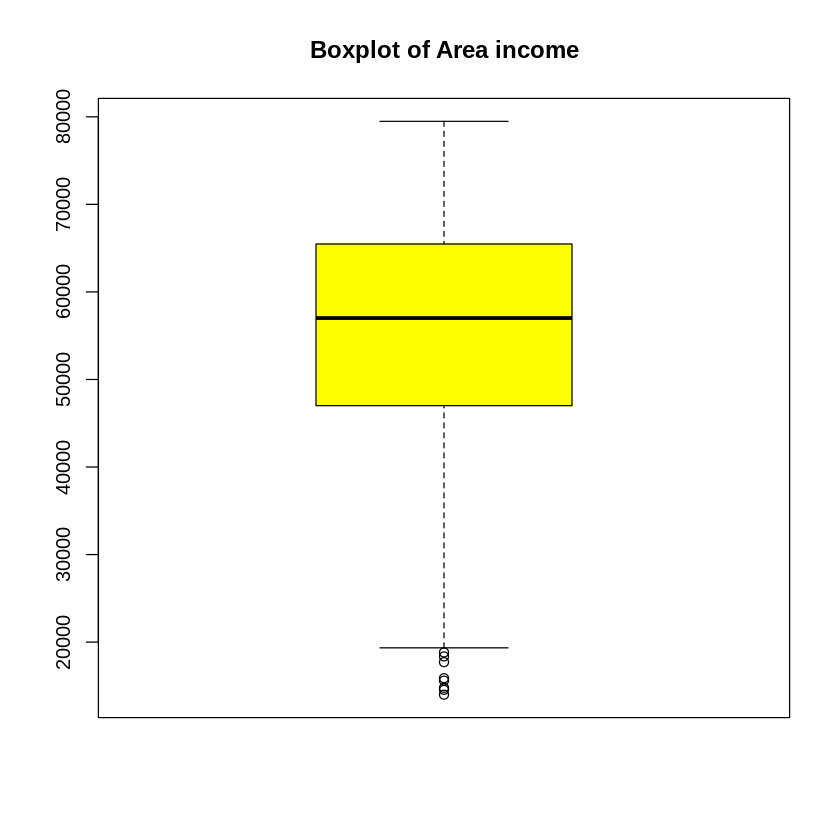

In [ ]:
#we plot a boxplot to see the distribution of daily internet used.
boxplot(data$Area.Income,col = 'yellow', main = "Boxplot of Area income")

In [ ]:
#Check the mode 
paste("mode:",getmode(data$Area.Income))
#We get the variance
paste("Variance:",var(data$Area.Income))
#We check the standard deviation
paste('Std dev:',sd(data$Area.Income))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Area.Income))
#Check skewness
paste('Skewness:',skewness(data$Area.Income))

[1] "mode: 61833.9"

[1] "Variance: 179952405.951775"

[1] "Std dev: 13414.6340222824"

[1] "Kurtosis: -0.105305938380741"

[1] "Skewness: -0.649396701694076"

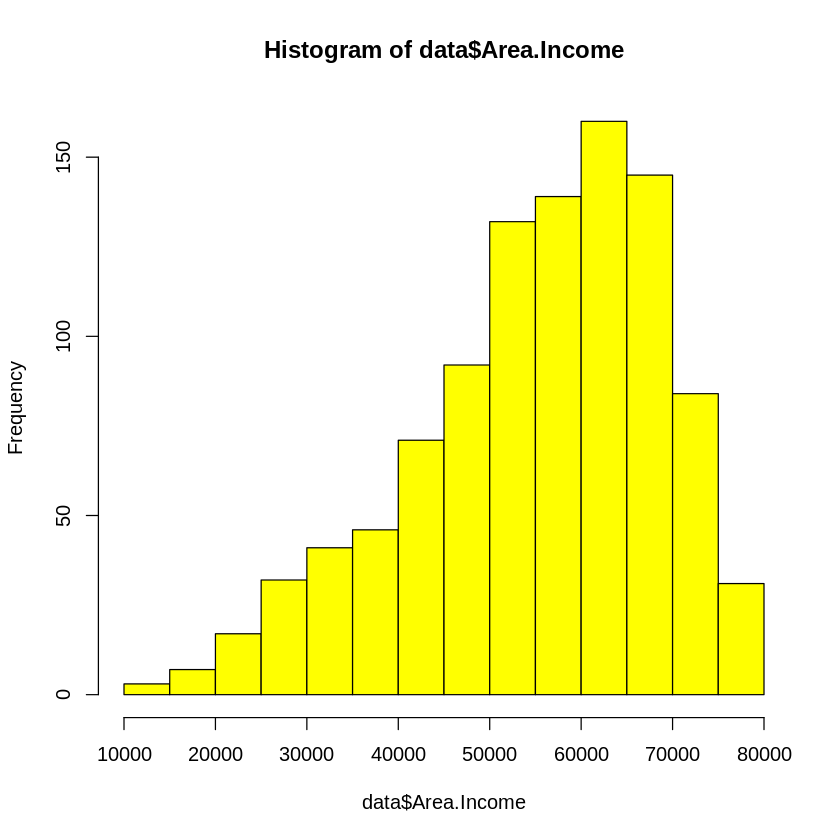

In [ ]:
#Visualise using  a histogram
hist(data$Area.Income,col='Yellow')

From our analysis,

Area income has outliers, we will not deal with it since earnings differ depending on the occupation.

The variance is large

It is negatively skewed and has a negative kurtosis.

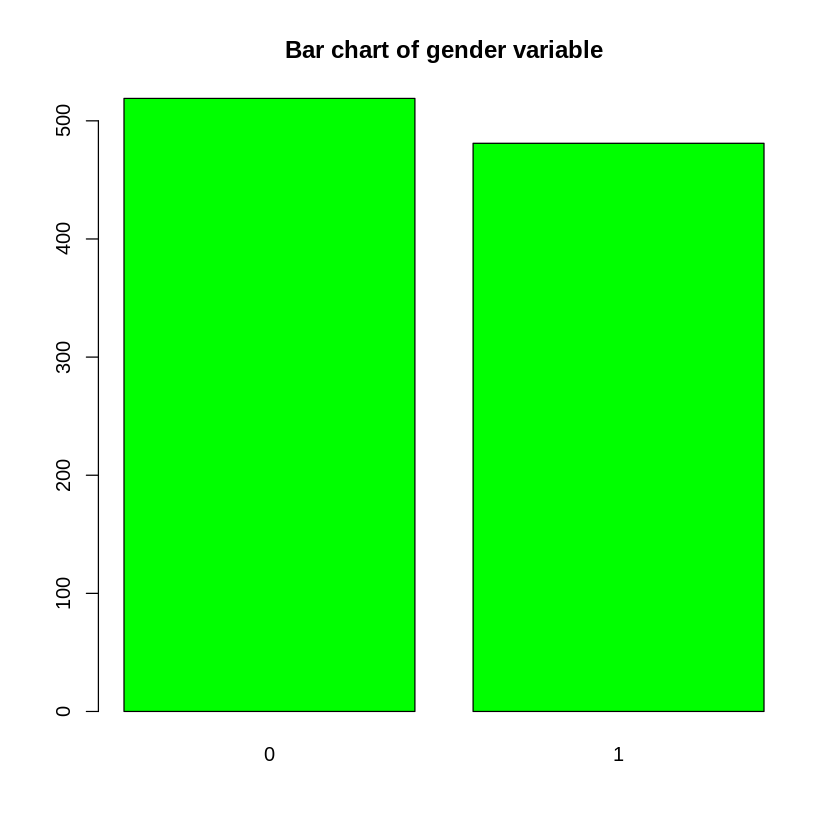

In [ ]:
#plotting barcharts of categorical variables

Male<-data$Male         
male_frequency<- table(Male)   
#plotting bar charts using the frequency tables 
par(mfrow=c(1,1))
barplot((male_frequency), col = "green", main = "Bar chart of gender variable")


##Bivariate  and Multivariate Analysis.

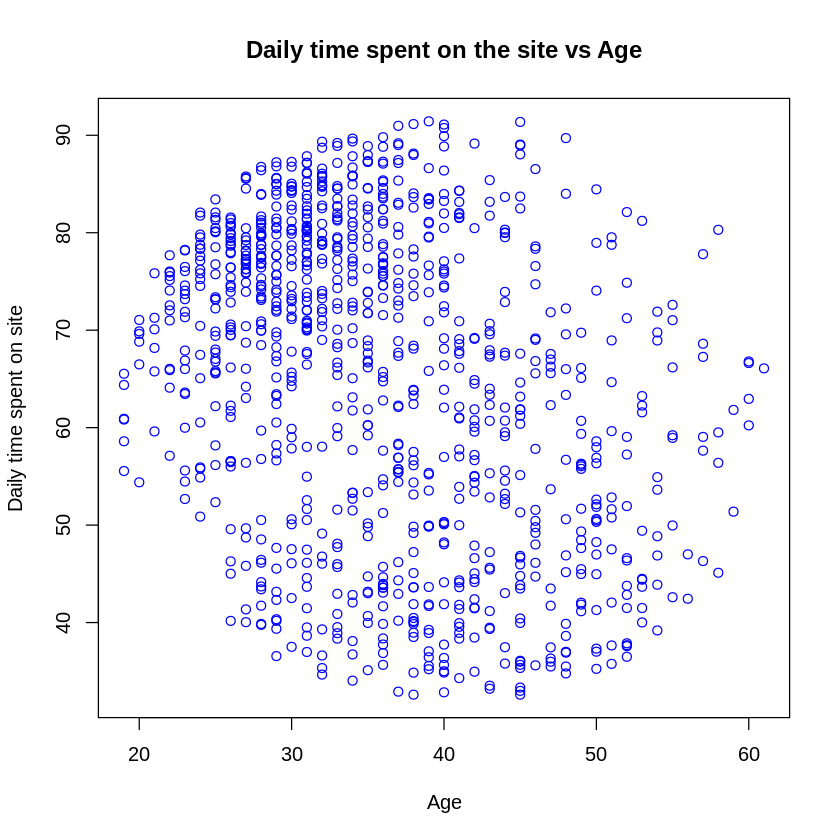

In [ ]:
plot(data$Age,data$Daily.Time.Spent.on.Site,
main='Daily time spent on the site vs Age',col='blue',
xlab='Age',ylab='Daily time spent on site')

From above, we can see that people under the age 40 spend more time on the site. Those between ages 30 to 50 vary, some spend the least but some in the same range spend the most.

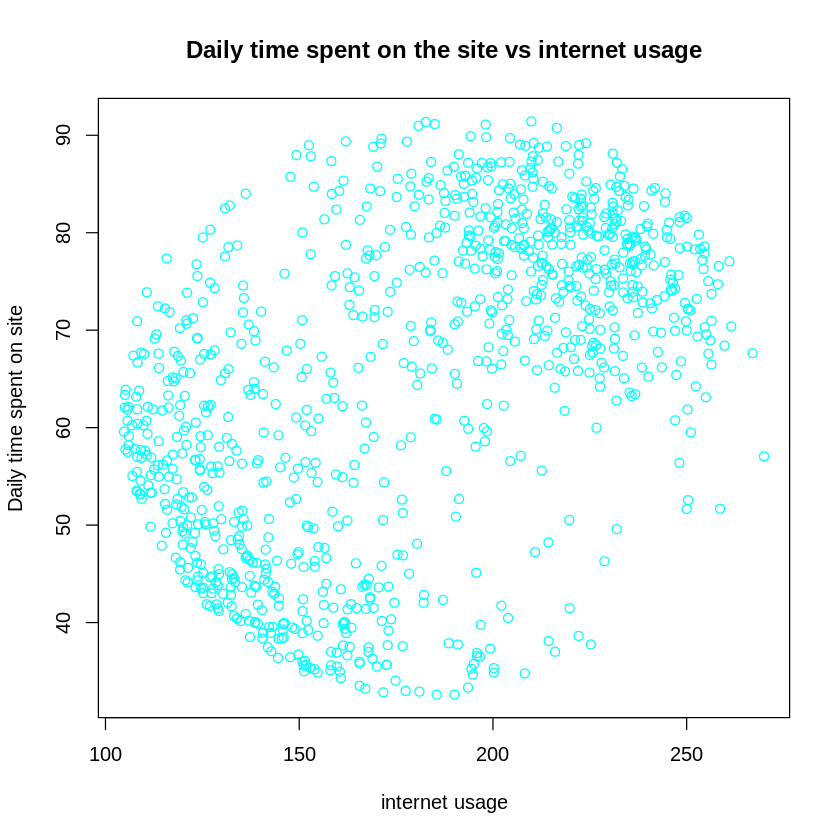

In [ ]:
plot(data$Daily.Internet.Usage,data$Daily.Time.Spent.on.Site,
main='Daily time spent on the site vs internet usage', col='cyan',
xlab='internet usage',ylab='Daily time spent on site')

Daily time spent on the site is linearly related to the internet usage.

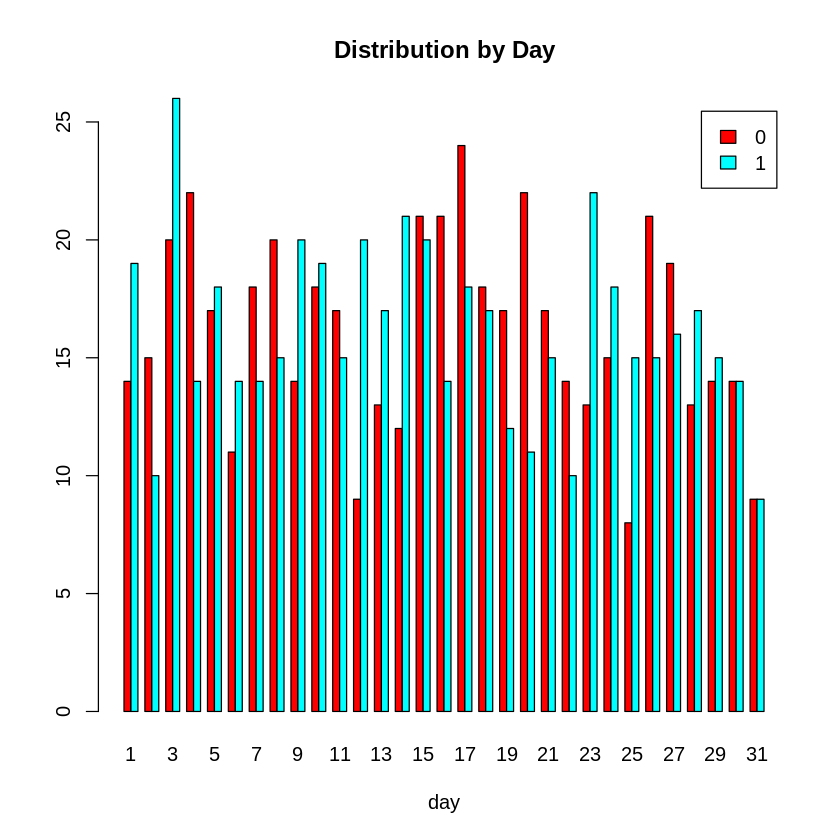

In [ ]:
#check in our new columns from timestamp have relation with our target variable
day <- table(data$Clicked.on.Ad, data$day) 
barplot(day, main="Distribution by Day",col = c("red", "cyan"),beside=TRUE,
   legend = rownames(day), xlab = "day") 

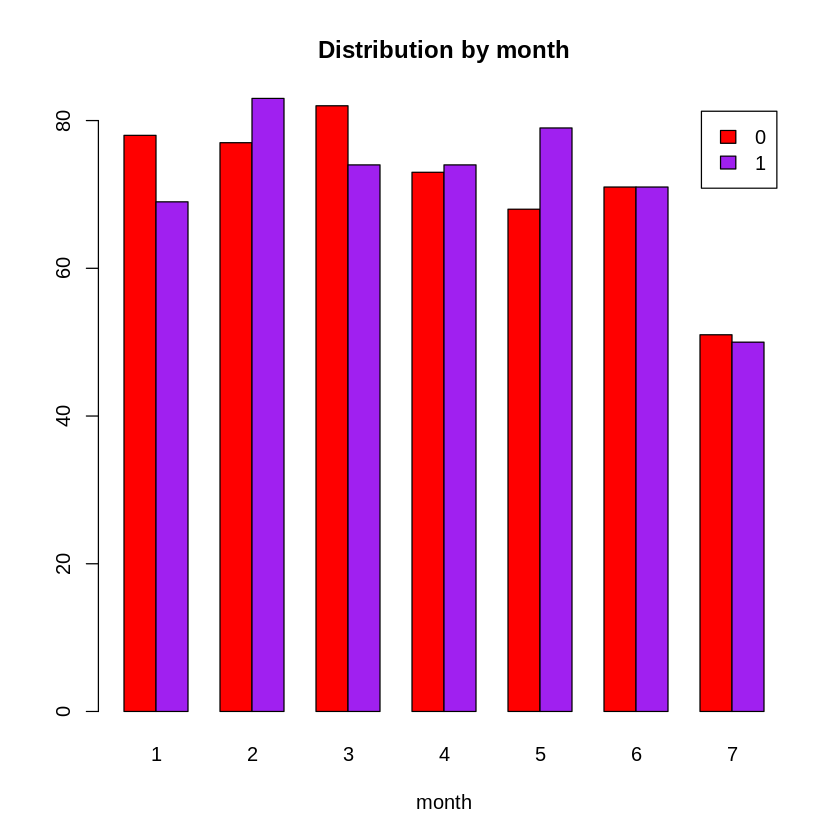

In [ ]:
#Month vs clicked on ad
month <- table(data$Clicked.on.Ad,data$month) 
barplot(month, main="Distribution by month",col = c("red", "purple"),beside=TRUE,
legend = rownames(month), xlab = "month") 

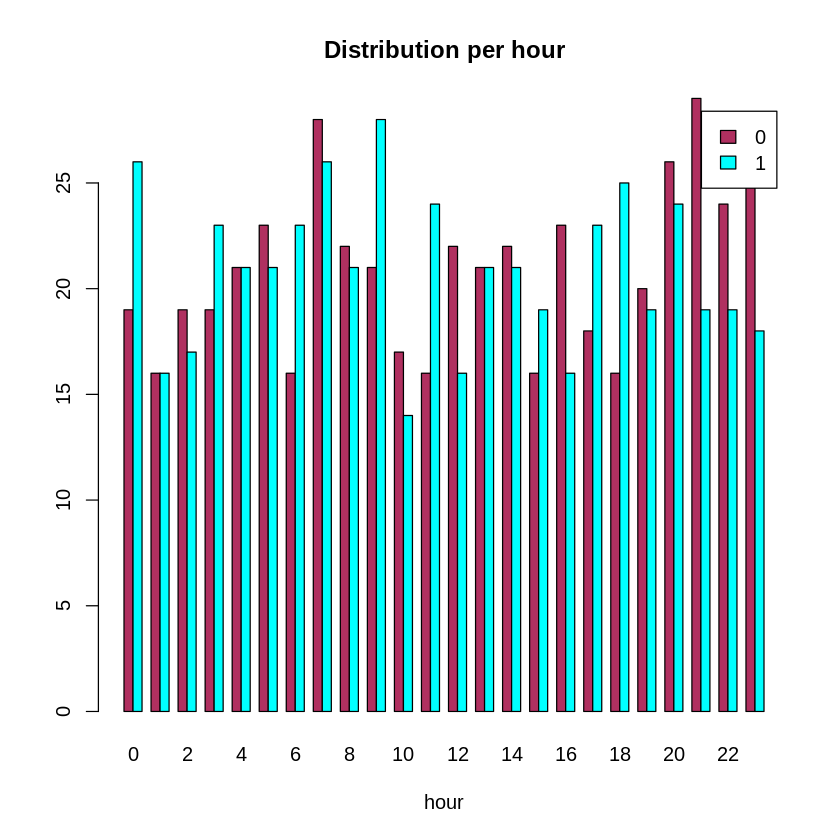

In [ ]:
#Hour vs clicked on ad
hour <- table(data$Clicked.on.Ad,data$hour) 
barplot(hour, main="Distribution per hour",col = c("maroon", "cyan"),beside=TRUE,
legend = rownames(hour), xlab = "hour") 

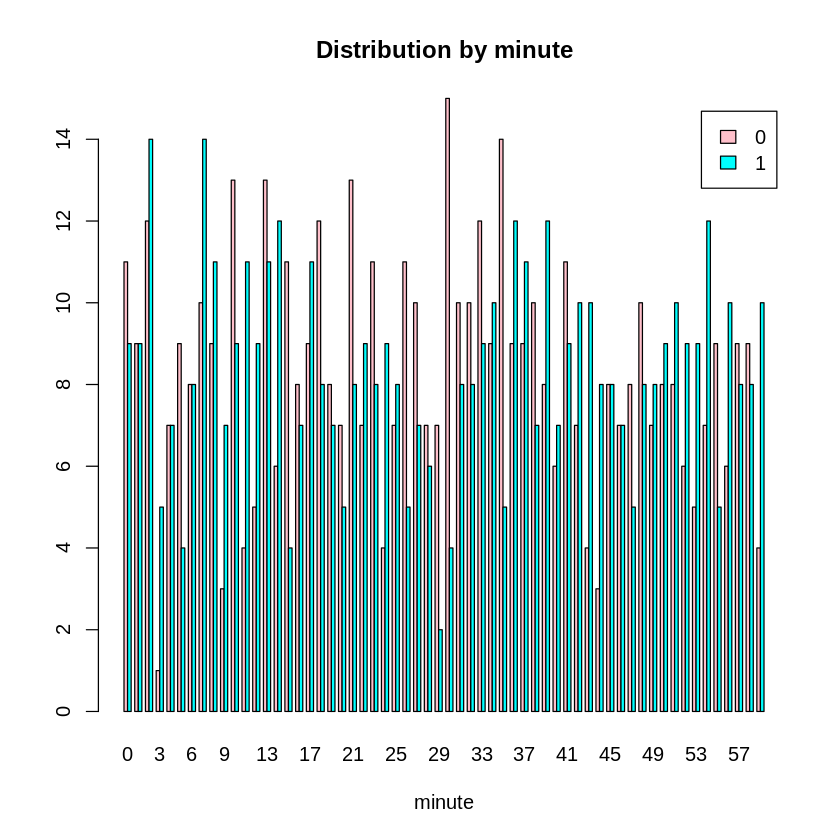

In [ ]:
#Minute vs clicked on ad
minute<- table(data$Clicked.on.Ad,data$min) 
barplot(minute, main="Distribution by minute",col = c("pink", "cyan"),
    beside=TRUE,legend=rownames(hour), xlab = "minute")

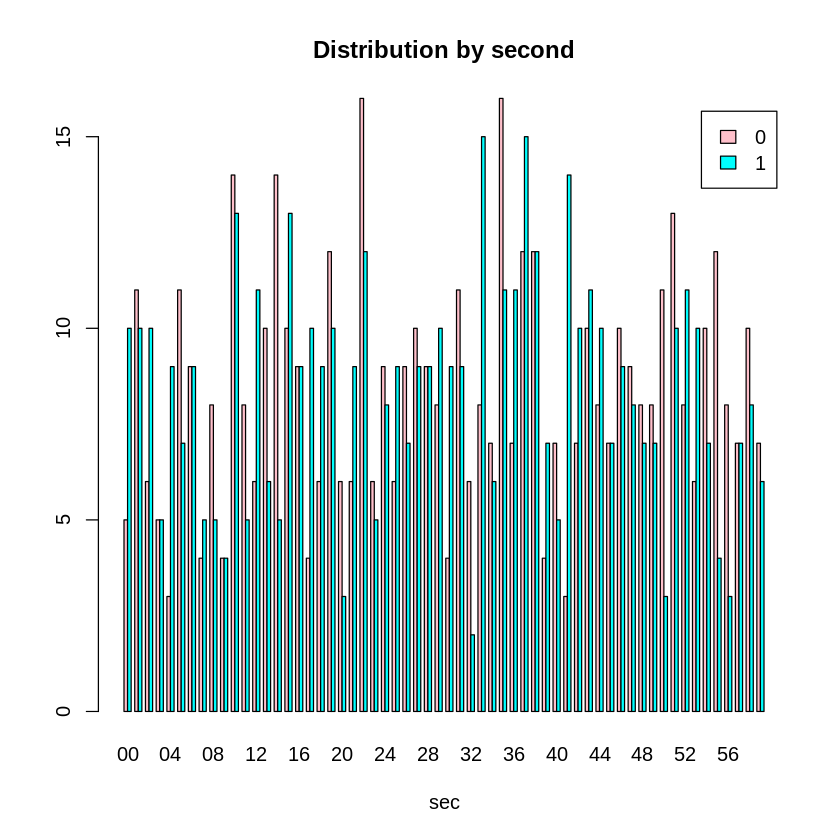

In [ ]:
sec <- table(data$Clicked.on.Ad,data$sec) 
barplot(sec, main="Distribution by second",col = c("pink", "cyan"),
beside=TRUE,legend=rownames(sec), xlab = "sec")

From our analysis above, we can see that there is no distinct relation between someone clicking on the ad and the month,day,hour minute or second.
The numbers are almost the same.

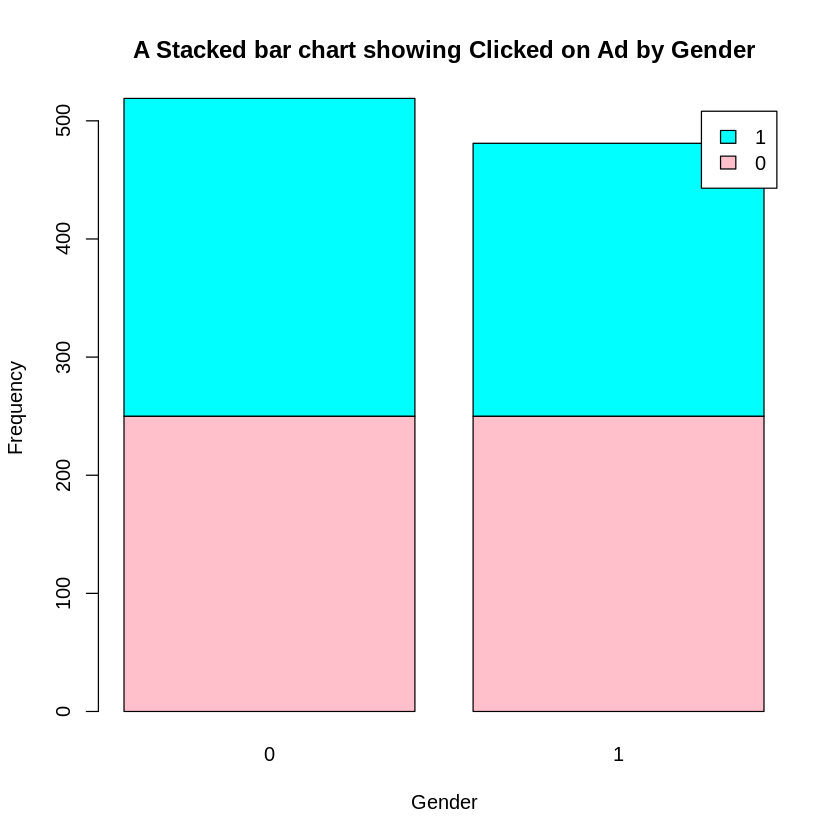

In [ ]:
count <- table(data$Clicked.on.Ad, data$Male)
barplot(count,
main = "A Stacked bar chart showing Clicked on Ad by Gender",
xlab = "Gender",
ylab = "Frequency",
col = c("pink","cyan"),
legend = rownames(count)
)

From our plot, more females clicked on the ad than male.The number of male was smaller compared to that of females

In [ ]:
#installing the necessary packages and the libraries.
install.packages("corrplot")
#Import our corrplot library.
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



In [ ]:
data5 <-data[,-9]

In [ ]:
head(data5)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad,day,month,hour,min
,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,68.95,35,61833.90,256.09,0,0,27,3,0,53
2,80.23,31,68441.85,193.77,1,0,4,4,1,39
3,69.47,26,59785.94,236.50,0,0,13,3,20,35
4,74.15,29,54806.18,245.89,1,0,10,1,2,31
5,68.37,35,73889.99,225.58,0,0,3,6,3,36
6,59.99,23,59761.56,226.74,1,0,19,5,14,30


Warning message in cor(data):
“the standard deviation is zero”


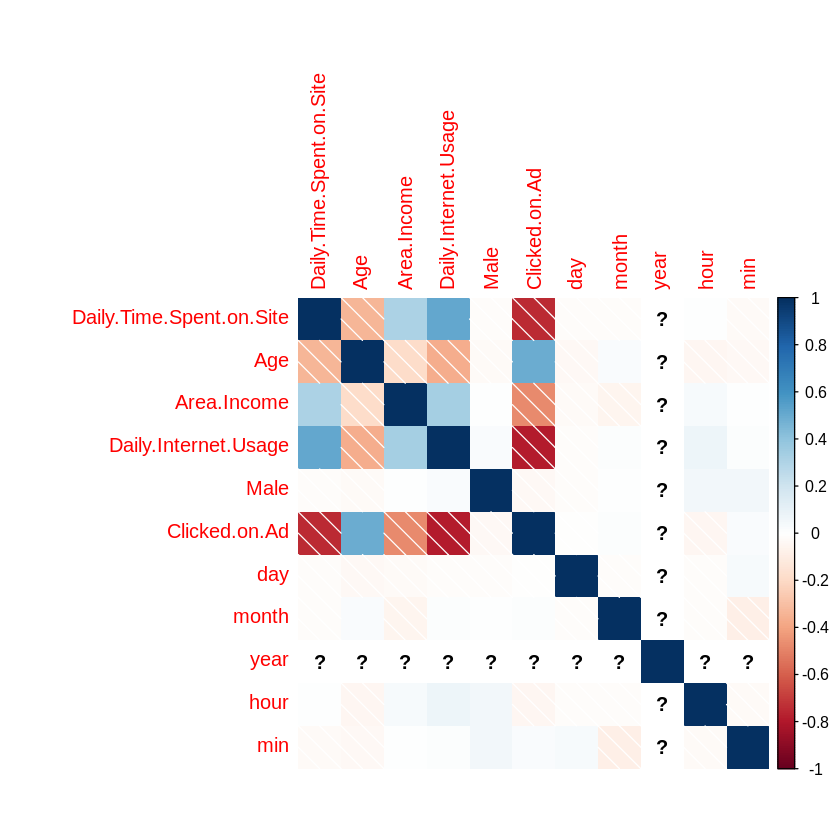

In [ ]:
#`getting the numeric values of our dataaset
data= data[, sapply(data, is.numeric)]
#plotting the numeric values
corrplot(cor(data), method = 'shade')

In [ ]:
# Checking the correlation of the numeric values.
cor(data)

Warning message in cor(data):
“the standard deviation is zero”


,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad,day,month,year,hour,min
Daily.Time.Spent.on.Site,1.0000000000,-0.33151334,0.310954413,0.51865848,-0.018950855,-0.748116564,-0.011217360,-0.010919562,NA,0.0008949812,-0.021814934
Age,-0.3315133428,1.00000000,-0.182604955,-0.36720856,-0.021044064,0.492531266,-0.038161625,0.023689247,NA,-0.0499051285,-0.030467212
Area.Income,0.3109544125,-0.18260496,1.000000000,0.33749553,0.001322359,-0.476254628,-0.026523412,-0.050216130,NA,0.0345729170,0.001157562
Daily.Internet.Usage,0.5186584753,-0.36720856,0.337495533,1.00000000,0.028012326,-0.786539176,-0.012530762,0.017529853,NA,0.0743469886,0.010604748
Male,-0.0189508546,-0.02104406,0.001322359,0.02801233,1.000000000,-0.038027466,-0.013252632,0.005219737,NA,0.0585520575,0.057699607
Clicked.on.Ad,-0.7481165641,0.49253127,-0.476254628,-0.78653918,-0.038027466,1.000000000,-0.005269365,0.016095459,NA,-0.0474310291,0.022969162
day,-0.0112173604,-0.03816163,-0.026523412,-0.01253076,-0.013252632,-0.005269365,1.000000000,-0.017273510,NA,-0.0170644864,0.037559426
month,-0.0109195620,0.02368925,-0.050216130,0.01752985,0.005219737,0.016095459,-0.017273510,1.000000000,NA,-0.0137476053,-0.089898643
year,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA
hour,0.0008949812,-0.04990513,0.034572917,0.07434699,0.058552057,-0.047431029,-0.017064486,-0.013747605,NA,1.0000000000,-0.021105737


From the correlation above,Male has no relation with the rest of the numeric variables except itself.

Daily time spent on the site is inversely correlated to individual who clicked on the site and the age. they have correlation of -0.748 and 0.3315 respectively.

Daily time spent on the site is strongly correlated to the daily internet usage, from general knowlegde, the more you on a site, the more internet you use. It has a correlation of 0.518.

Age and individual who clicked on the ad arestrongly correlated. a correlation of 0.49

##KNN

It is a classification and a regression algorithm.
In classification, given new data points, KNN classifies them by voting for the nearest neighbours . KNN is a lazy learner as it learns the least from the training data.

In [ ]:
#Dealing with missing values
data <- na.omit(data)

In [ ]:
#we normalize/scale data
#this is to ensure that no attribute has more effect on the cluster than the other.
df <- as.data.frame(apply(data, 2, function(x) (x - min(x))/(max(x)-min(x))))

In [ ]:
# Creating a random number equal 90% of total number of rows
data1 <- sample(1:nrow(data),0.9 * nrow(df))

In [ ]:
# The training dataset extracted
train <- data[data1,-6]
test <- data[data1, -6]
# The test dataset extracted


In [ ]:
# The actual values of 6th column of testing dataset to compare it with values that will be predicted
# also convert ordered factor to normal factor
test_target <- as.factor(data[data1,6])

In [ ]:
# Running the knn function
library(class)
pr<-knn(train[, -1], test[, -1], test_target,k=20)
 
# Creating the confusion matrix
tb <- table(pr,test_target)
 
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)

[1] 72.66667

An accuracy of 72% is good.We can try a different value k=10 to see if our accuracy improve.

In [ ]:
#fitting our model.
pr<-knn(train[, -1], test[, -1], test_target,k=10)
 
# Creating the confusion matrix
tb <- table(pr,test_target)
 
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)

[1] 74.33333

Reducing k increases our accuracy

In [ ]:
pr<-knn(train[, -1], test[, -1], test_target,k=5)
 
# Creating the confusion matrix
tb <- table(pr,test_target)
 
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)

[1] 80.88889

It even gets better when k is smaller.

In [ ]:
#Fit our KNN model
pr<-knn(train[, -1], test[, -1], test_target,k=2)
 
# Creating the confucion matrix
tb <- table(pr,test_target)
 
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)

[1] 88.77778

Gets way better with k=2.

##SVM

In [ ]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2



In [ ]:
#check the nulls.
anyNA(data3)

[1] FALSE

In [ ]:
#we normalize/scale data
#this is to ensure that no attribute has more effect on the cluster than the other.
data3 <- as.data.frame(apply(data5, 2, function(x) (x - min(x))/(max(x)-min(x))))

In [ ]:
# We will use our normalized dataframe data3.
# Next we split the data into training set and testing set.
#Our target variable is clicked_on_ad
#we are using a percentage split of 70-30 ratio.
#training[["Clicked.on.Ad"]] = factor(training[["Clicked.on.Ad"]])

intrain <- createDataPartition(y = data3$Clicked.on.Ad, p= 0.7, list = FALSE)
training <- data3[intrain,]
testing <- data3[-intrain,]


In [ ]:
# We check the dimensions of out training dataframe and testing dataframe
dim(training); 
dim(testing);

[1] 700  10

[1] 300  10

In [ ]:
data3$Clicked.on.Ad=as.factor(data3$Clicked.on.Ad)

In [ ]:
str(data3)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  0.618 0.81 0.627 0.706 0.608 ...
 $ Age                     : num  0.381 0.286 0.167 0.238 0.381 ...
 $ Area.Income             : num  0.73 0.831 0.699 0.623 0.915 ...
 $ Daily.Internet.Usage    : num  0.916 0.539 0.797 0.854 0.731 ...
 $ Male                    : num  0 1 0 1 0 1 0 1 1 1 ...
 $ Clicked.on.Ad           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ day                     : num  0.8667 0.1 0.4 0.3 0.0667 ...
 $ month                   : num  0.333 0.5 0.333 0 0.833 ...
 $ hour                    : num  0 0.0435 0.8696 0.087 0.1304 ...
 $ min                     : num  0.898 0.661 0.593 0.525 0.61 ...


In [ ]:
install.packages('kernlab')
library(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [ ]:
# Before training we control our computational over heads, we will use traincontrol() and 
#repeated cross validation method. we are using 10 iterations and repeats 3
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(Clicked.on.Ad ~., data = data3, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)


In [ ]:
# We can then check the result of our train() model as shown below
svm_Linear

Support Vector Machines with Linear Kernel 

1000 samples
   9 predictor
   2 classes: '0', '1' 

Pre-processing: centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 900, 900, 900, 900, 900, 900, ... 
Resampling results:

  Accuracy  Kappa
  0.967     0.934

Tuning parameter 'C' was held constant at a value of 1

In [ ]:
# We use the predict() method for predicting results  
#  our trained model and our testing data frame as our argument.
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0
 [38] 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0
 [75] 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0
[112] 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1
[149] 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1
[186] 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0
[223] 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
[260] 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0
[297] 0 0 1 1
Levels: 0 1

In [ ]:
install.packages('e1071')
library(e1071)

In [ ]:
# Now checking for our accuracy of our model by using a confusion matrix 
confusionMatrix(table(test_pred, testing$Clicked.on.Ad))


Confusion Matrix and Statistics

         
test_pred   0   1
        0 147   4
        1   3 146
                                          
               Accuracy : 0.9767          
                 95% CI : (0.9525, 0.9906)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9533          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9800          
            Specificity : 0.9733          
         Pos Pred Value : 0.9735          
         Neg Pred Value : 0.9799          
             Prevalence : 0.5000          
         Detection Rate : 0.4900          
   Detection Prevalence : 0.5033          
      Balanced Accuracy : 0.9767          
                                          
       'Positive' Class : 0               
                                          

An accuracy of 97% is good, our model is doing great. Better than the KNN.

80-20 split

In [ ]:
#80-20 split
intrain <- createDataPartition(y = data3$Clicked.on.Ad, p= 0.8, list = FALSE)
training <- data3[intrain,]
testing <- data3[-intrain,]

#control
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(Clicked.on.Ad ~., data = data3, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)
# We can then check the result of our train() model as shown below
svm_Linear


Support Vector Machines with Linear Kernel 

1000 samples
   9 predictor
   2 classes: '0', '1' 

Pre-processing: centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 900, 900, 900, 900, 900, 900, ... 
Resampling results:

  Accuracy  Kappa
  0.969     0.938

Tuning parameter 'C' was held constant at a value of 1

In [ ]:
#predict
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 [38] 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 [75] 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0
[112] 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0
[149] 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1
[186] 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1
Levels: 0 1

In [ ]:
# Now checking for our accuracy of our model by using a confusion matrix 
confusionMatrix(table(test_pred, testing$Clicked.on.Ad))


Confusion Matrix and Statistics

         
test_pred   0   1
        0 100   4
        1   0  96
                                          
               Accuracy : 0.98            
                 95% CI : (0.9496, 0.9945)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.96            
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9600          
         Pos Pred Value : 0.9615          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5200          
      Balanced Accuracy : 0.9800          
                                          
       'Positive' Class : 0               
                                          

Increasing the train sample and reducing the test sample increased our accuracy to 98%. This is the best accuracy obtained. Only 4 elements were wrongly classified from our confusion matrix.

##NAIVE BAYES

In [ ]:
install.packages('klaR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [134]:
# Creating objects x which holds the predictor variables and y which holds the response variables
x = training[,-6]
y = training$Clicked.on.Ad

In [135]:
# Now building our model 
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))

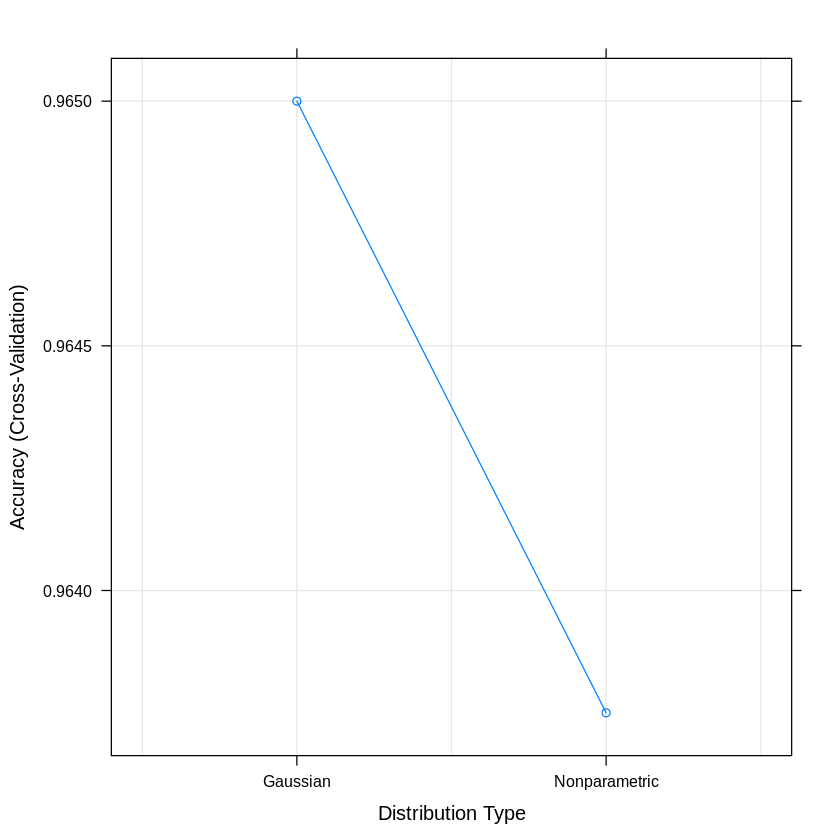

In [156]:
plot(model)

In [137]:
# Model Evalution
# ---
# Predicting our testing set
# 
Predict <- predict(model,newdata = testing )

# Getting the confusion matrix to see accuracy value and other parameter values
# ---
# 
confusionMatrix(Predict, testing$Clicked.on.Ad )

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 97  3
         1  3 97
                                          
               Accuracy : 0.97            
                 95% CI : (0.9358, 0.9889)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.94            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.970           
            Specificity : 0.970           
         Pos Pred Value : 0.970           
         Neg Pred Value : 0.970           
             Prevalence : 0.500           
         Detection Rate : 0.485           
   Detection Prevalence : 0.500           
      Balanced Accuracy : 0.970           
                                          
       'Positive' Class : 0               
                                    

Our model accuracy is 97%. it is doing great, the svm is still far better than it.

##DECISION TREES.

In [ ]:
install.packages('rpart.plot')
install.packages('mlbench')
library(rpart)
library(rpart.plot)
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



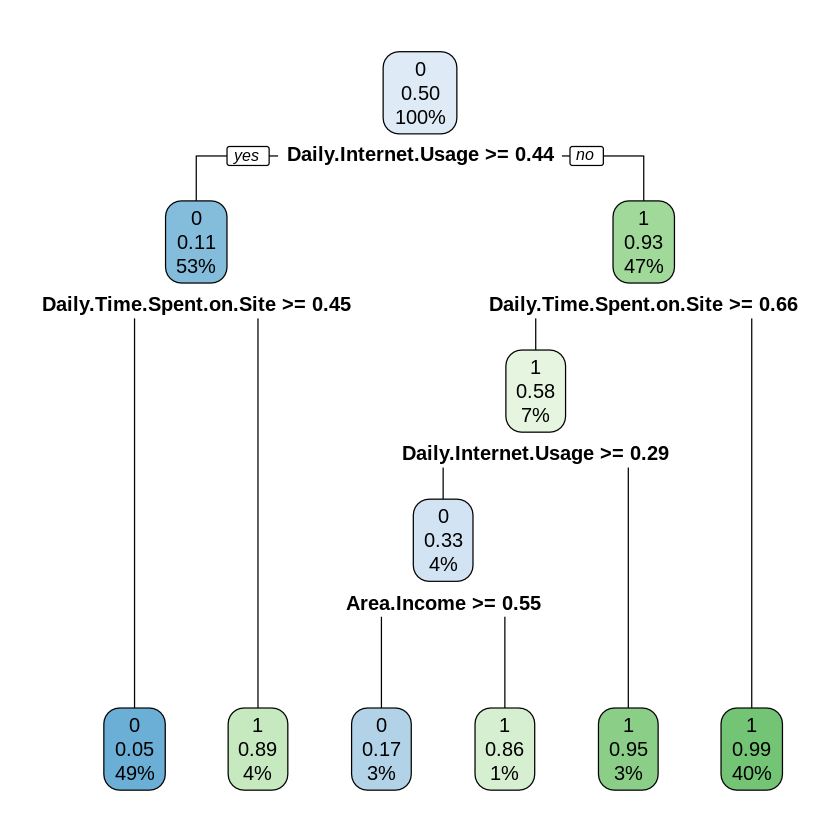

In [ ]:
#data(df)
#m <- rpart(Class ~ ., data = df,
 #          method = "class")

#rpart.plot(m)

# fitting and training the model using the decision tree classifier
fit <- rpart(Clicked.on.Ad ~ ., data = training, method = 'class')
rpart.plot(fit, extra = 106)

In [ ]:
# making predictions
predict_unseen <- predict(fit, testing, type = 'class')

In [ ]:
# comparing predicted values to actual results
table_mat <- table(testing$Clicked.on.Ad, predict_unseen)
table_mat

   predict_unseen
      0   1
  0 139  11
  1   3 147

In [ ]:
# calculating the accuracy
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy:', accuracy_Test))

[1] "Accuracy: 0.953333333333333"


our model is fine.an accuracy of 95% is good.SVM still performed better than decision tree.

##Challenging our solution using Random Forest.

In [150]:
install.packages('randomForest')
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [151]:
# Training the model
# initialize an instance of random forest.
rf <- randomForest(
  Clicked.on.Ad ~ .,
  data=training
)


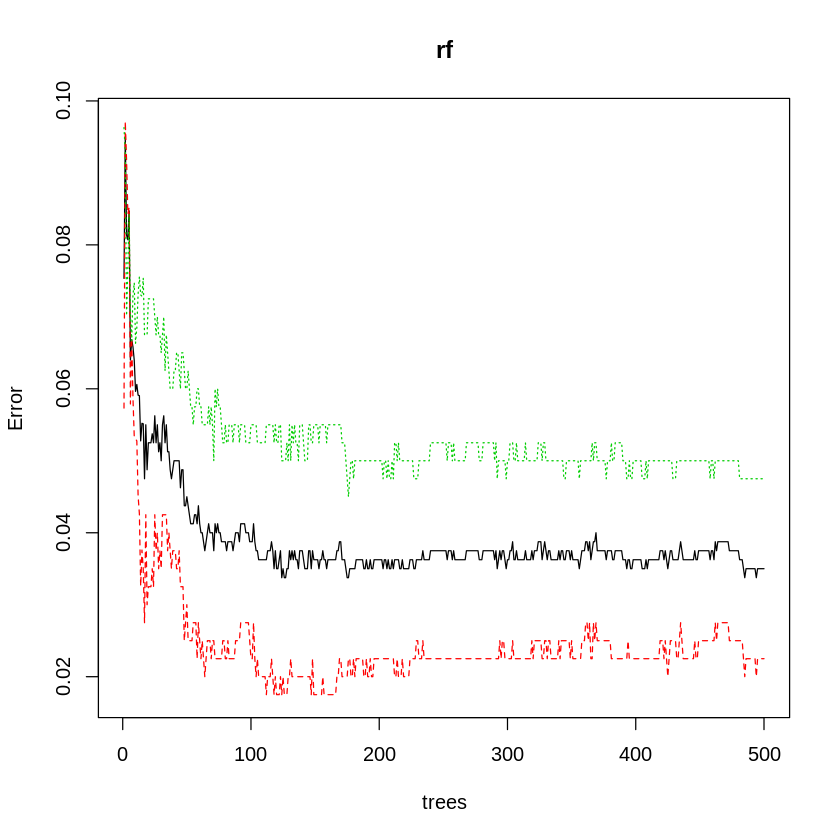

In [157]:
plot(rf)

In [153]:
#we use our model to predict
pred = predict(rf, newdata=testing)

In [154]:
# comparing predicted values to actual results
table_mat <- table(testing$Clicked.on.Ad, pred)
table_mat

   pred
     0  1
  0 98  2
  1  7 93

Our model is great, 2 elements were wrongly classifed as True and 7 as false.we check the accuracy score.

In [155]:
# calculating the accuracy
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy:', accuracy_Test))

[1] "Accuracy: 0.955"


Our model is better than decision trees, slight improvement with an accuracy of 95.5%. SVM model is still the best with the highest accuracy.

##Conclusion  and Recommendations.

From our analysis ans visualisation, our dataset showed us interesting trends and correlation

The gender has no correlation with other variables except itself. The more someone is on the site, the more they use internet, this is normal from our general knowledge and is what we expect of any analysis but they are less likely to click on the ad. 

Male are less likely to click on the ad compared to females. People of younger are less likely to click on ad.

February is the month that had the most clicked on ad.

Our models did well, SVM performed the best with an accuracy of 98%.
Challenging our solution using random forest, the model performed better than KNN and decision trees. 

The company should not target any sex in making their ads since it has no impact.
Older audience too should be considered since the young audience are less likely to click the ad or  they block them.
Posting the ads during the peak months too help increase the people clicking on ad.

##Follow up questions

1. Are our model predictions reliable?